# **Análisis de Dimensionalidad**
**Elaborador por:** \
Johan Enrique Páez Romero 2210631 \
Ivan Camilo Caballero Jaimes 2210625 \
Semillero de Investigación en Geofísica Aplicada y Computacional - **SIGAC**

El análisis de dimensional corresponde a uno de los metodos de análisis de las funciones de respuesta.\
El procesamiento de Series de Tiempo permite pasar del dominio del tiempo al dominio de la frecuencia *(funciones de respuesta)*. \
El análisis de estas funciones permite: \
**1.** Conocer la dimesionalidad de los datos \
**2.** Corregir los datos \
**3.** Reconocer indicios de anisotropia en las estructuras.

## Liberías


In [6]:
from pathlib import Path
from mtpy import MT, MTCollection
## mtpy 1.1.5
## mtpy-v2 2.0.7
import h5py
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Lectura de Datos

In [10]:
mc = MTCollection()
mc.open_collection(Path("../data/transfers_functions/level_0/cerromachin_collection.h5"))

In [11]:
mc.master_dataframe.head()

,station,survey,latitude,longitude,elevation,tf_id,units,has_impedance,has_tipper,has_covariance,period_min,period_max,hdf5_reference,station_hdf5_reference
0,MC0001,MC,4.453861,-75.337556,2091.0,MC0001,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
1,MC0002,MC,4.469861,-75.389528,2125.0,MC0002,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
2,MC0006,MC,4.444083,-75.357556,1820.0,MC0006,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
3,MC0007,MC,4.459944,-75.348806,2070.0,MC0007,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>
4,MC0008,MC,4.449639,-75.347694,1787.0,MC0008,none,True,True,False,0.000096,2941.176471,<HDF5 object reference>,<HDF5 object reference>


In [9]:
mc.close_collection()

24:10:01T16:51:02 | INFO | line:761 |mth5.mth5 | close_mth5 | Flushing and closing ..\data\transfers_functions\level_0\cerromachin_collection.h5


24:10:01T16:51:19 | WARNING | line:300 |mtpy.core.mt_collection | get_tf | Found multiple transfer functions with ID MC0041. Suggest setting survey, otherwise returning the TF from survey MC.


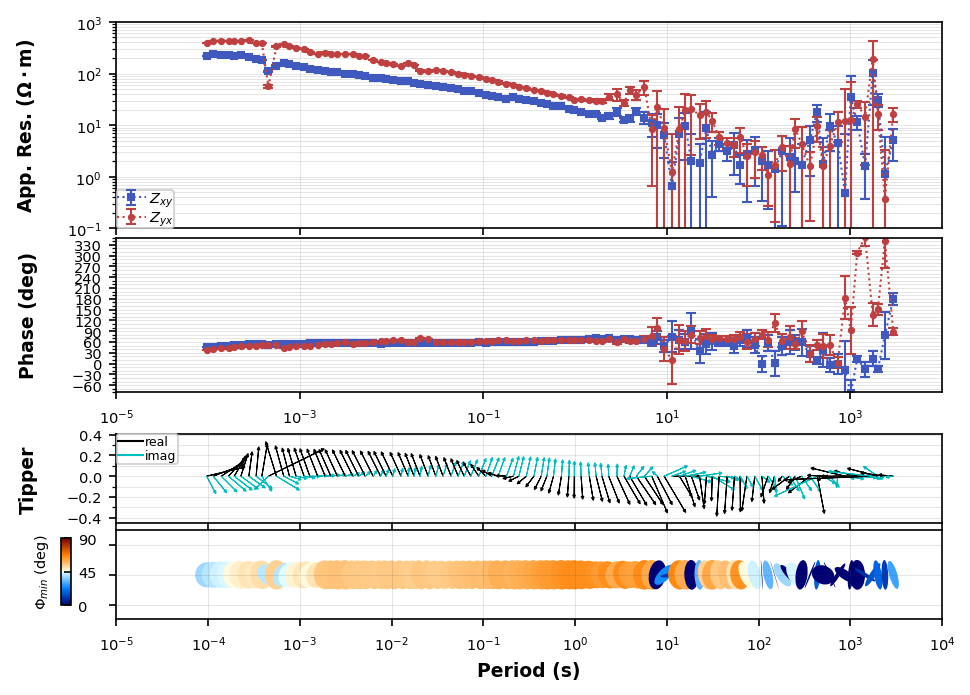

In [12]:
# Observamos las funciones de transferencia de un estación
try:
    mc.plot_mt_response("MC0041")
except:
    pass

In [13]:
%%time
mt_data = mc.to_mt_data()

CPU times: total: 2.72 s
Wall time: 9.04 s


In [14]:
# Se escoge un rango de periodos objetivo (ejemplo, 0.005 a 9 [s]), con un total de 20 datos
interp_periods = np.logspace(np.log10(0.0032), np.log10(9.2), 50)
# Interpolación de los datos de cada estación 
interp_mt_data = mt_data.interpolate(interp_periods, inplace=False)

In [15]:
type(interp_mt_data)

mtpy.core.mt_data.MTData

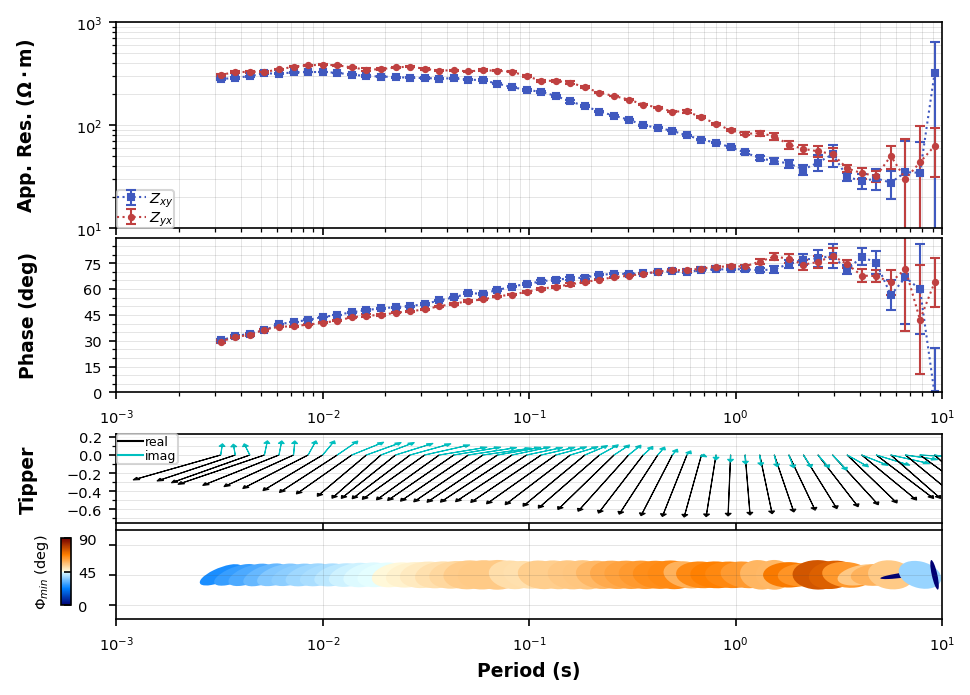

In [16]:
try:
    interp_mt_data.plot_mt_response("MC.MC0042")
except:
    pass

In [9]:
interp_mt_data.plot_phase_tensor_map(
    plot_tipper="yri",
    ellipse_size=0.005,               # Aumentado para mayor visibilidad
    arrow_size=0.02,                 # Ajustado para que las flechas sean más notorias
    arrow_head_width=0.003,           # Ampliado para una mejor representación
    arrow_head_length=0.002,          # Aumentado para que las cabezas sean más prominentes
    arrow_lw=0.0005,                  # Incrementado para un mejor grosor
    x_pad=0.01,                       # Mayor espaciado horizontal
    y_pad=0.01,                       # Mayor espaciado vertical
    plot_period=0.01,                 # Asegúrate que este valor esté en el rango de tus datos
)
plt.savefig('Tensor_Fase_001s.svg', dpi=300)

: 

### Mapa

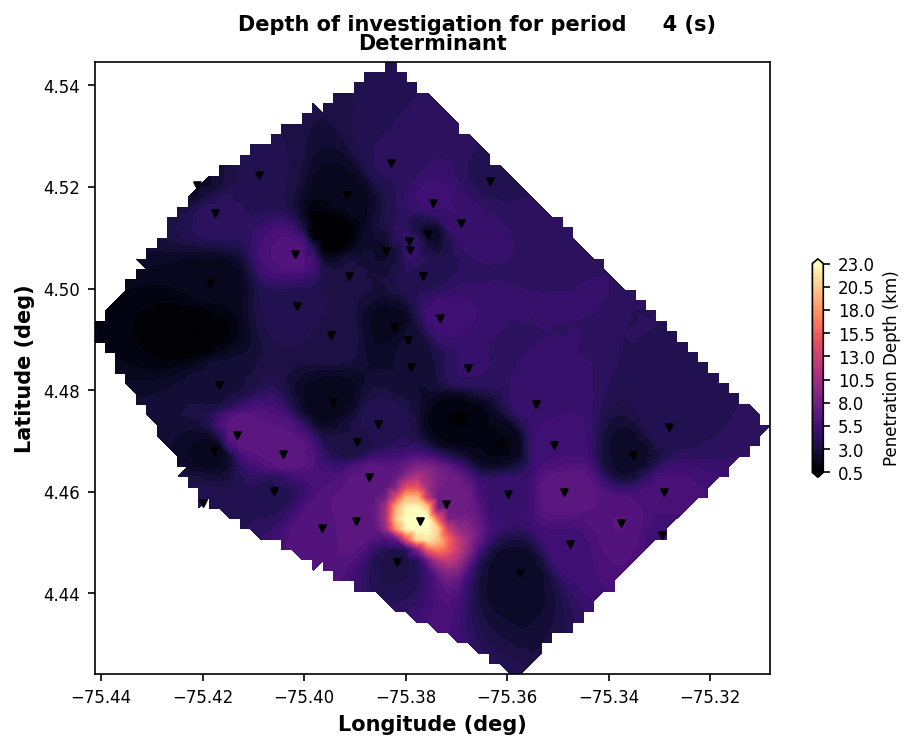

In [15]:
plot_doi_map = interp_mt_data.plot_penetration_depth_map(plot_period = 4, interpolation_method="delaunay", fig_num=3, plot_te=False, plot_tm=False)
#plt.savefig('profundidad_penetracion_001.svg', dpi=300)

## Mapa de resistividad aparente

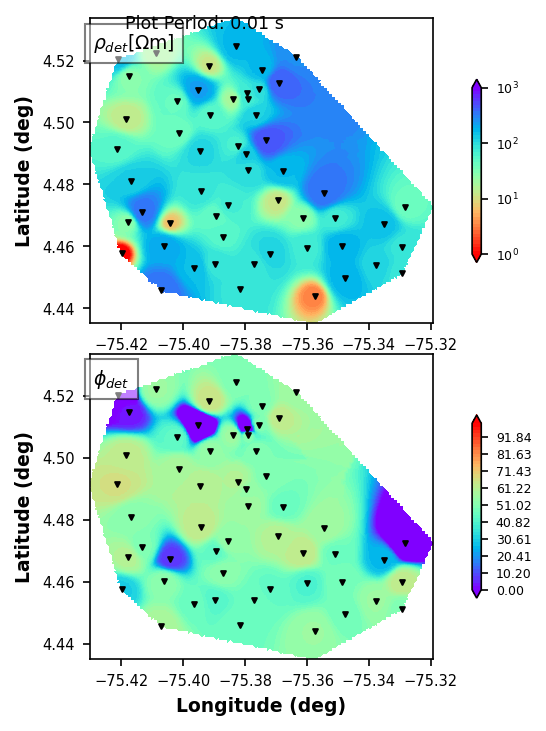

In [16]:
plot_rp_maps = interp_mt_data.plot_resistivity_phase_maps( 
    fig_num=1,
    interpolation_method = "delaunay",
    cell_size = .0009,
    marker_size=5
)
plot_rp_maps.plot_period = 0.01
plot_rp_maps.fig_num = 8
plot_rp_maps.plot_det = True
plot_rp_maps.plot_xy = False
plot_rp_maps.plot_de = False
plot_rp_maps.plot_yx = False
#plot_rp_maps.cell_size = .05
plot_rp_maps.redraw_plot()
plt.savefig('Mapa_Resistividad_001.svg', dpi=300)

In [17]:
mc.close_collection()

24:09:26T23:54:04 | INFO | line:771 |mth5.mth5 | close_mth5 | Flushing and closing Data\transfer_functions\cerromachin_collectionC.h5


### Pseudosección Tensor de Fase

#### SET-1

In [27]:
%matplotlib inline

In [28]:
from pyproj import CRS
utm_crs = CRS.from_epsg(32618)  # Cambia al EPSG correcto para tu caso
interp_mt_data.utm_crs = utm_crs

In [63]:
Perfil_1=interp_mt_data.get_subset(station_list=["MC.MC0024","MC.MC0060","MC.MC0021","MC.MC0041" ,"MC.MC0040","MC.MC0002","MC.MC0014","MC.MC0032"])

In [68]:
type(Perfil_1)

mtpy.core.mt_data.MTData

In [48]:
print(Perfil_1)

survey  station  latitude  longitude  elevation  datum_epsg  east  north  utm_epsg  model_east  model_north  model_elevation  profile_offset
------------------------------------------------------------------------
MC      MC0024  4.5223    -75.4089  2008.00 4326  454644.31   499876.88   32618 0.00         0.00         2008.00      320764.66    

Model Center:
4.5223    -75.4089  0.00    454644.31   499876.88   32618 

Mean Values:


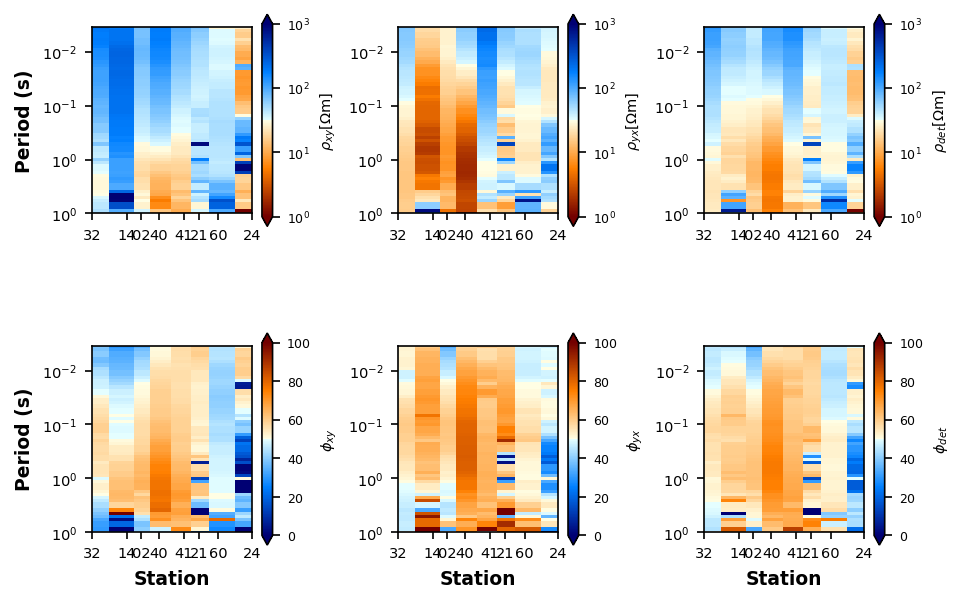

Plotting PlotResPhasePseudoSection

In [99]:
Perfil_1.plot_resistivity_phase_pseudosections(
    y_stretch=3000, plot_det=True,
    station_id=[4, None],
    res_limits=[0,3],
    interpolated_method = 'delaunay'
)

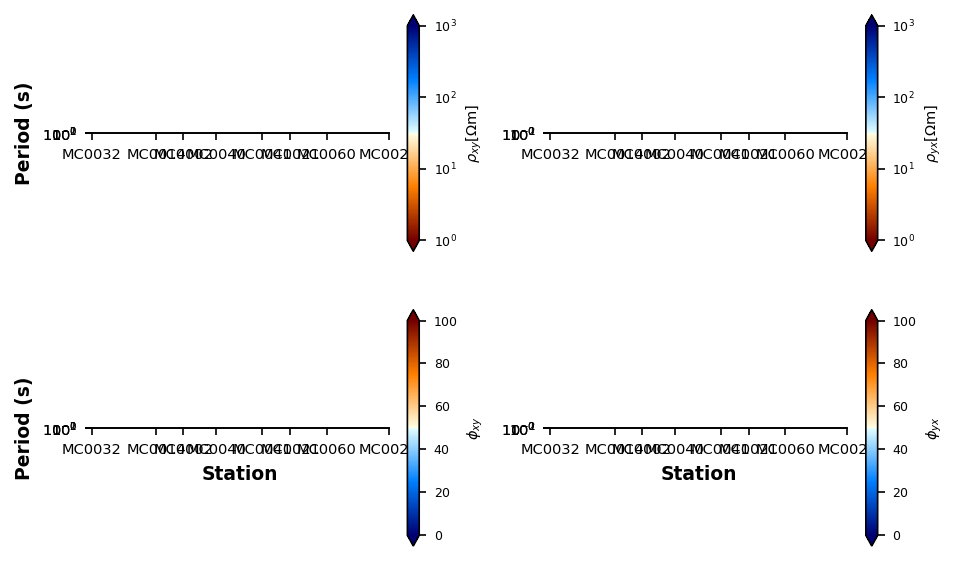

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_basename',
 '_get_cmap',
 '_get_colorbar',
 '_get_data_df',
 '_get_interpolated_t',
 '_get_interpolated_t_err',
 '_get_interpolated_z',
 '_get_interpolated_z_error',
 '_get_n_columns',
 '_get_n_rows',
 '_get_n_subplots',
 '_get_offset',
 '_get_offset_station',
 '_get_period_array',
 '_get_profile_line',
 '_get_subplots',
 '_rotation_angle',
 '_set_subplot_params',
 'arrow_color_imag',
 'arrow_color_real',
 'arrow_direction',
 'arrow_head_length',
 'arrow_head_width',
 'arrow_imag_properties',
 'arrow_lw',
 'arrow_real_properties',
 'arrow_size',
 'arrow_threshold',
 'aspect',
 'cb_label_dict',
 'cb_orie

In [39]:
dir(Perfil_1.plot_resistivity_phase_pseudosections())

In [77]:
perfil1= Perfil_1

In [82]:
perfil1.get()

TypeError: get expected at least 1 argument, got 0

In [87]:
# Import required modules
import os
import mtpy.imaging.plotpseudosection as pps
# define edi path and savepath
edi_path = '../data/edis/this/'
savepath = r'C:/tmp'
# list all edi files in directory
edi_list = [os.path.join(edi_path,ff) for ff in os.listdir(edi_path) \
if (ff.endswith('.edi'))]
# make a plot

In [88]:
print(edi_list)

['../data/edis/this/MC0002.edi', '../data/edis/this/MC0014.edi', '../data/edis/this/MC0021.edi', '../data/edis/this/MC0024.edi', '../data/edis/this/MC0032.edi', '../data/edis/this/MC0040.edi', '../data/edis/this/MC0041.edi', '../data/edis/this/MC0060.edi']


In [91]:
pps.PlotResPhasePseudoSection(
    fn_list = edi_list,
    linedir='ns', # 'ns' or 'ew' - approximate line
    # orientation
    plot_xx = 'n', # plot xx component 'y' or 'n'
    plot_xy = 'y', # plot xy component 'y' or 'n'
    plot_yx = 'y', # plot yx component 'y' or 'n'
    plot_yy = 'n', # plot yy component 'y' or 'n'
    res_limits=[0,3], # log resistivity limits
    phase_limits=[0,90], # log phase limits
    shift_yx_phase = True, # True or False
    plot_style='pcolormesh' # 'pcolormesh' or 'imshow'
)


AttributeError: 'MTplot' object has no attribute 'read_mt_file'

In [29]:
mc.close_collection()

24:10:01T16:44:32 | INFO | line:771 |mth5.mth5 | close_mth5 | Flushing and closing Data\transfer_functions\cerromachin_collectionC.h5


In [86]:
Set_1=interp_mt_data.get_subset(station_list=["MC.MC0001","MC.MC0007","MC.MC0008","MC.MC0009"
                                              ,"MC.MC0010","MC.MC0018"])#,"MC.MC0012","MC.MC0015"

In [72]:
print(Set_1)

survey  station  latitude  longitude  elevation  datum_epsg  east  north  utm_epsg  model_east  model_north  model_elevation  profile_offset
------------------------------------------------------------------------
MC      MC0001  4.4539    -75.3376  2091.00 4326  462550.98   492303.99   32618 0.00         0.00         2091.00      305220.28    
MC      MC0007  4.4599    -75.3488  2070.00 4326  461303.18   492977.01   32618 0.00         0.00         2070.00      303833.47    
MC      MC0008  4.4496    -75.3477  1787.00 4326  461425.92   491837.79   32618 0.00         0.00         1787.00      304271.99    
MC      MC0009  4.4514    -75.3294  2381.00 4326  463450.72   492030.30   32618 0.00         0.00         2381.00      306160.68    
MC      MC0010  4.4691    -75.3509  2098.00 4326  461075.62   493993.46   32618 0.00         0.00         2098.00      303328.92    
MC      MC0012  4.4599    -75.3292  2223.00 4326  463475.80   492972.94   32618 0.00         0.00         2223.00      30

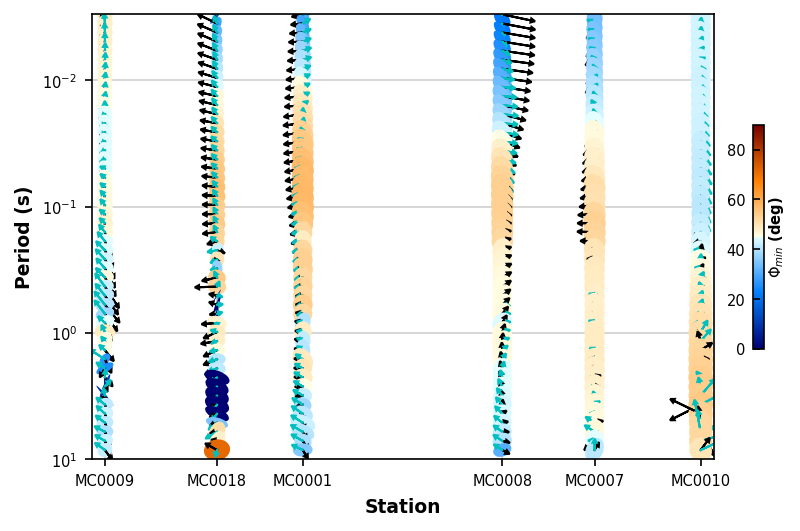

In [111]:
Set_1.plot_phase_tensor_pseudosection( 
    plot_tipper="yri", 
    ellipse_size = 2500,
    arrow_lw = 2,
    arrow_size = 6000,
    arrow_head_width = 400,
    fig_num=2, 
    profile_reverse=True,
    y_limits=(10**1, 0.003),
    x_stretch = 20.0,
    y_stretch = 12000
)
plt.savefig('Set_1.png', dpi=300)

TypeError: Got both 'size' and 'fontsize', which are aliases of one another

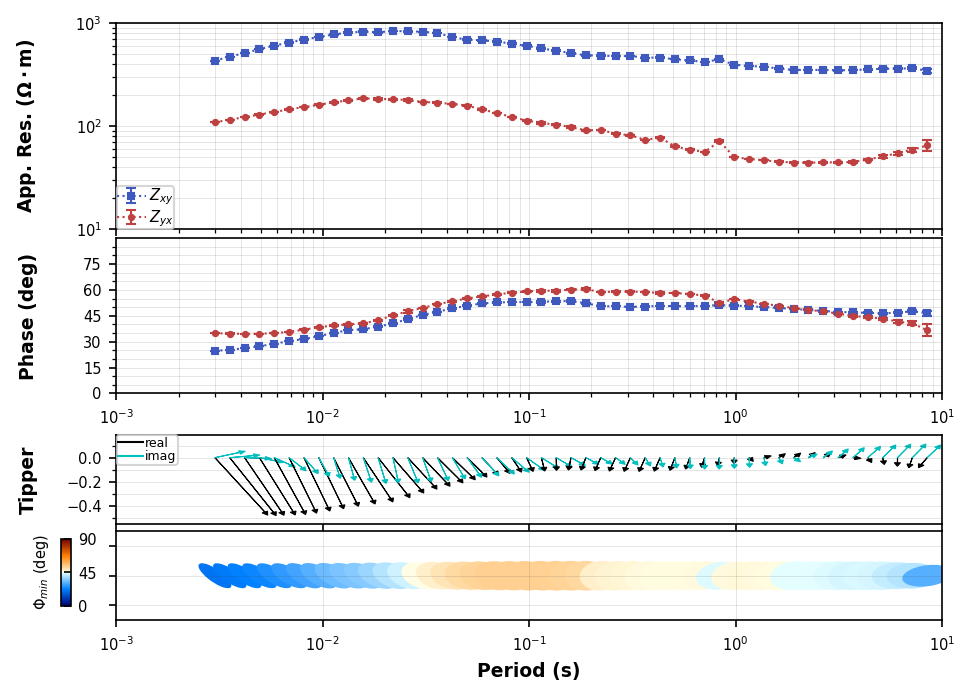

In [141]:
Set_1.plot_mt_response("MC.MC0008")

TypeError: Got both 'size' and 'fontsize', which are aliases of one another

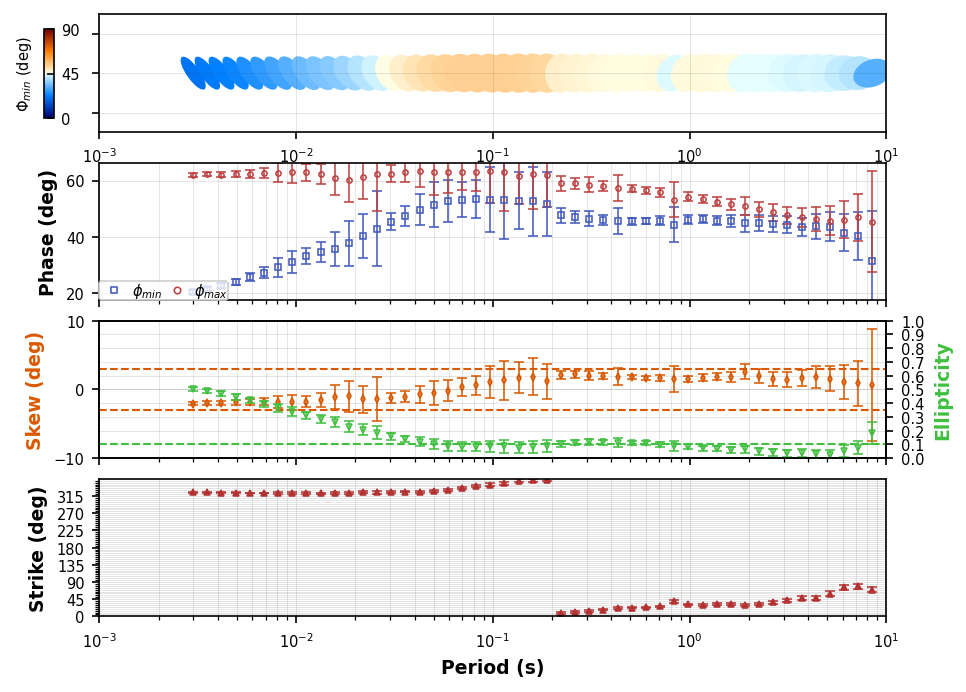

In [140]:
Set_1.plot_phase_tensor("MC.MC0008")
plt.savefig('MC0001.png', dpi=300)

#### SET-2

In [109]:
Set_2=interp_mt_data.get_subset(station_list=["MC.MC0040","MC.MC0041","MC.MC0055","MC.MC0056"
                                              ,"MC.MC0057"])#,"MC.MC0068"
print(Set_2)

survey  station  latitude  longitude  elevation  datum_epsg  east  north  utm_epsg  model_east  model_north  model_elevation  profile_offset
------------------------------------------------------------------------
MC      MC0040  4.4777    -75.3944  2330.00 4326  456250.19   494944.70   32618 0.00         0.00         2330.00      298430.87    
MC      MC0041  4.4909    -75.3946  2387.00 4326  456223.23   496397.08   32618 0.00         0.00         2387.00      297996.08    
MC      MC0055  4.4924    -75.3824  2514.00 4326  457579.23   496562.17   32618 0.00         0.00         2514.00      299250.74    
MC      MC0056  4.4899    -75.3796  2506.00 4326  457893.41   496285.66   32618 0.00         0.00         2506.00      299630.06    
MC      MC0057  4.4846    -75.3789  2523.00 4326  457967.07   495708.36   32618 0.00         0.00         2523.00      299863.29    

Model Center:
4.4850    -75.3867  0.00    457095.15   495753.44   32618 

Mean Values:


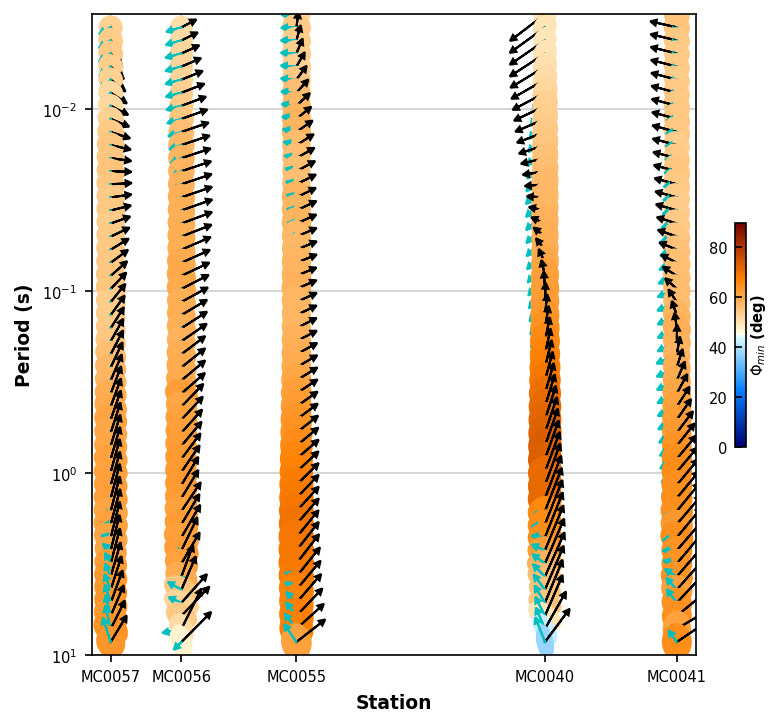

In [112]:
Set_2.plot_phase_tensor_pseudosection( 
    plot_tipper="yri", 
    ellipse_size = 2500,
    arrow_lw = 2,
    arrow_size = 6000,
    arrow_head_width = 400,
    fig_num=2, 
    profile_reverse=True,
    y_limits=(10**1, 0.003),
    x_stretch = 20.0,
    y_stretch = 12000
)
plt.savefig('Set_2.png', dpi=300)

TypeError: Got both 'size' and 'fontsize', which are aliases of one another

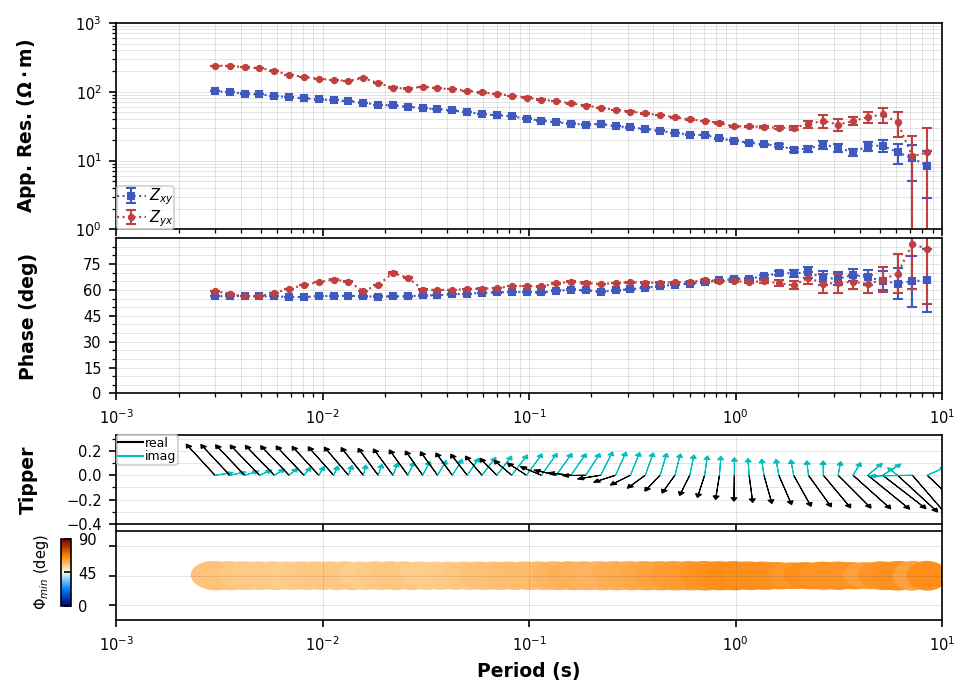

In [147]:
Set_2.plot_mt_response("MC.MC0041")

TypeError: Got both 'size' and 'fontsize', which are aliases of one another

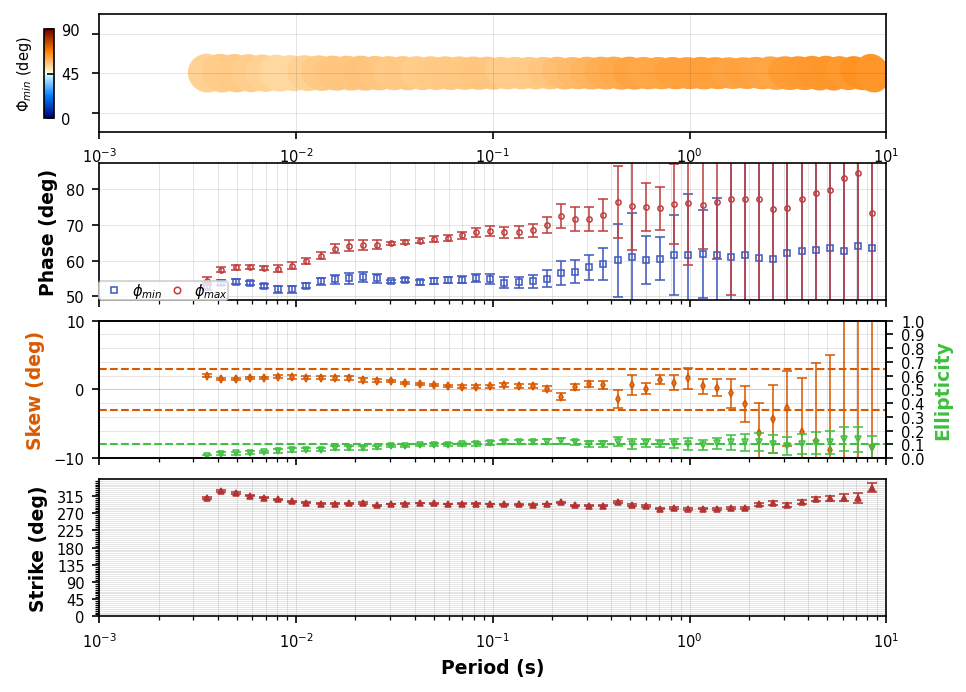

In [145]:
Set_2.plot_phase_tensor("MC.MC0057")

#### SET-3/Falla Cajamarca

In [123]:
Set_3=interp_mt_data.get_subset(station_list=["MC.MC0060","MC.MC0050","MC.MC0049","MC.MC0066"])#"MC.MC0019","MC.MC0036","MC.MC0066","MC.MC0065"
print(Set_3)

survey  station  latitude  longitude  elevation  datum_epsg  east  north  utm_epsg  model_east  model_north  model_elevation  profile_offset
------------------------------------------------------------------------
MC      MC0060  4.5069    -75.4019  2112.00 4326  455416.82   498169.23   32618 0.00         0.00         2112.00      296723.33    
MC      MC0050  4.5183    -75.3916  2695.00 4326  456560.76   499433.67   32618 0.00         0.00         2695.00      297464.97    
MC      MC0049  4.5246    -75.3828  2894.00 4326  457534.88   500130.16   32618 0.00         0.00         2894.00      298203.58    
MC      MC0066  4.5107    -75.3756  2316.00 4326  458338.35   498591.40   32618 0.00         0.00         2316.00      299407.80    

Model Center:
4.5158    -75.3887  0.00    456877.59   499149.70   32618 

Mean Values:


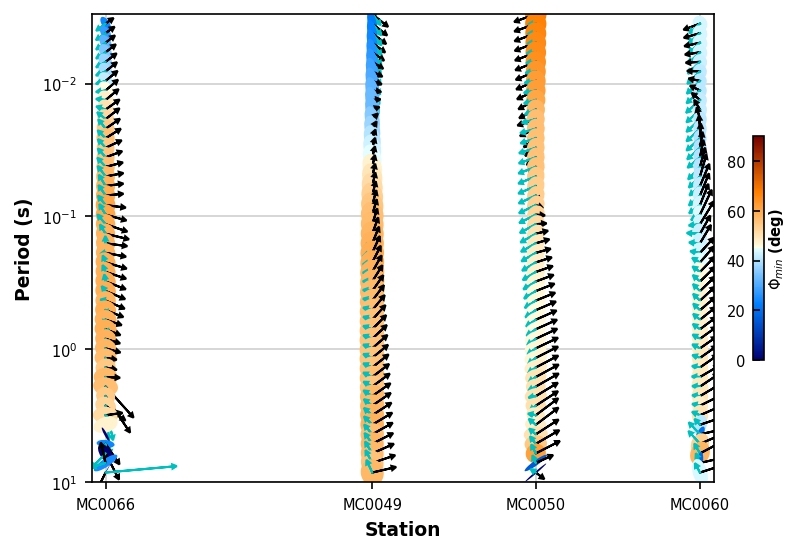

In [124]:
Set_3.plot_phase_tensor_pseudosection( 
    plot_tipper="yri", 
    ellipse_size = 2500,
    arrow_lw = 2,
    arrow_size = 6000,
    arrow_head_width = 400,
    fig_num=2, 
    profile_reverse=True,
    y_limits=(10**1, 0.003),
    x_stretch = 20.0,
    y_stretch = 12000
)
plt.savefig('Set_3_2.png', dpi=300)

TypeError: Got both 'size' and 'fontsize', which are aliases of one another

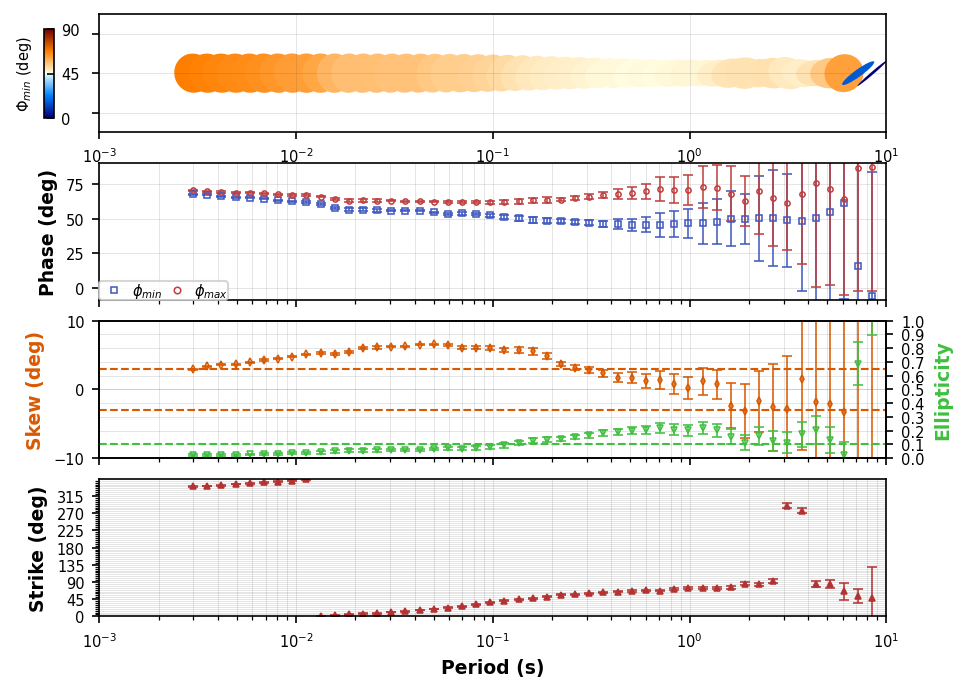

In [146]:
plot_Set3=Set_3.plot_phase_tensor("MC.MC0050")


In [148]:
mc.close_collection()

24:09:27T20:14:32 | INFO | line:771 |mth5.mth5 | close_mth5 | Flushing and closing Data\transfer_functions\cerromachin_collectionC.h5


In [132]:
plot_Set3.rotation_angle=10
plot_Set3.fig_num=2
plot_Set3.redraw_plot()


NameError: name 'plot_Set3' is not defined

### Prueba de Mapa para ARCMAP

In [30]:
periodo=1/mc.get_tf("MC0041").Z.frequency
periodo

24:09:26T14:49:14 | WARNING | line:300 |mtpy.core.mt_collection | get_tf | Found multiple transfer functions with ID MC0041. Suggest setting survey, otherwise returning the TF from survey MC.


array([1.11111123e-03, 1.28205128e-03, 1.56249976e-03, 1.88679281e-03,
       2.17391304e-03, 2.56410191e-03, 3.12499902e-03, 3.77358491e-03,
       4.36681223e-03, 5.15463918e-03, 6.28930818e-03, 7.57575758e-03,
       8.69565217e-03, 1.03092794e-02, 1.26582262e-02, 1.51515152e-02,
       1.75438596e-02, 2.04081633e-02, 2.50000000e-02, 3.03030303e-02,
       3.63636364e-02, 4.44444444e-02, 5.31914894e-02, 6.17283951e-02,
       7.29927007e-02, 8.92857143e-02, 1.06382979e-01, 1.23456790e-01,
       1.44927536e-01, 1.78571429e-01, 2.12765957e-01, 2.43902439e-01,
       2.94117647e-01, 3.55871886e-01, 4.27350427e-01, 4.92610837e-01,
       5.81395349e-01, 7.09219858e-01, 8.54700855e-01, 9.80392157e-01,
       1.16279070e+00, 1.42857143e+00, 1.69491525e+00, 1.96078431e+00])

In [28]:
Estation = "MC00" + input("Ingresa el número de la estación: ")
#S41 = mc.get_tf("MC0041").Z
print("La estación guardada es:", Estation)
data_S = pd.DataFrame({
        "Periodo (s)": 1/mc.get_tf(Estation).Z.frequency,
        "Resistividad Aparente (ohm·m)": mc.get_tf(Estation).Z.res_det
    })
print(data_S.head(44))

La estación guardada es: MC0041
24:09:26T14:48:28 | WARNING | line:300 |mtpy.core.mt_collection | get_tf | Found multiple transfer functions with ID MC0041. Suggest setting survey, otherwise returning the TF from survey MC.
24:09:26T14:48:28 | WARNING | line:300 |mtpy.core.mt_collection | get_tf | Found multiple transfer functions with ID MC0041. Suggest setting survey, otherwise returning the TF from survey MC.
    Periodo (s)  Resistividad Aparente (ohm·m)
0      0.001111                     197.394409
1      0.001282                     178.666664
2      0.001562                     165.688416
3      0.001887                     169.944319
4      0.002174                     162.165527
5      0.002564                     157.773141
6      0.003125                     153.307474
7      0.003774                     150.735599
8      0.004367                     141.894876
9      0.005155                     141.466490
10     0.006289                     123.284853
11     0.007576     

In [ ]:
mc.plot_phase_tensor("YNP31B")

In [34]:
import mtpy.analysis.zinvariants as zinvariants

# Asegúrate de que tienes las frecuencias, la impedancia y el error de impedancia
frequencies = S41.Z.frequency  # O derivar de periodos si es necesario
impedance = S41.Z.z  # Tensor de impedancia
impedance_error = S41.Z.z_error  # Error del tensor de impedancia

# Crear el objeto de invariantes usando el tensor de impedancia, su error y las frecuencias
z_invariant = zinvariants.Zinvariants(z_array=impedance, z_err_array=impedance_error, freq=frequencies)

# Calcular las invariantes
z_invariant.compute_invariants()

# Mostrar las invariantes calculadas con texto en español
print(f"Inv1 (Parte real fuera de la diagonal): {z_invariant.inv1}")
print(f"Inv2 (Parte imaginaria fuera de la diagonal): {z_invariant.inv2}")
print(f"Inv3 (Factor de anisotropía real): {z_invariant.inv3}")
print(f"Inv4 (Factor de anisotropía imaginario): {z_invariant.inv4}")
print(f"Inv5 (Sugiere torsión del campo eléctrico): {z_invariant.inv5}")
print(f"Inv6 (Sugiere distorsión a pequeña escala en fase): {z_invariant.inv6}")
print(f"Inv7 (Sugiere estructura 3D): {z_invariant.inv7}")
print(f"Ángulo de rumbo (grados): {z_invariant.strike}")
print(f"Error del ángulo de rumbo (grados): {z_invariant.strike_err}")
print(f"Parámetro de dimensionalidad (q): {z_invariant.q}")


computing invariants
computing invariants
computing invariants
Inv1 (Parte real fuera de la diagonal): [595.8628721  526.07146296 442.56032934 386.6676281  346.38822038
 308.68778219 264.08141735 254.75449881 228.02575929 210.78709276
 167.08833761 143.63448448 125.65326215 109.11998895  93.16302892
 101.20869912  89.9204382   62.69533086  58.529177    61.93351519
  55.57197133  48.34619089  42.22115712  37.95045328  33.88782704
  28.68434952  25.8142075   23.16927274  19.19164824  16.83007111
  16.12448747  14.11637881  12.20392566  10.66160163   9.24785011
   8.16993417   7.23069309   6.14061944   5.24578079   4.64982521
   4.24812211   3.59051486   3.22427354   3.07175444]
Inv2 (Parte imaginaria fuera de la diagonal): [756.43396958 669.03192129 596.72633884 566.38890674 518.34716751
 475.62738345 433.02800306 380.74598055 343.99620073 315.96517411
 271.6776409  242.23585619 223.04165314 202.50857887 178.52311595
 162.16351241 143.91284775 130.60036424 114.56457492 101.25823785
  90.

c:\Users\USUARIO\anaconda3\envs\Simpeg\Lib\site-packages\mtpy\analysis\zinvariants.py:225: RuntimeWarning: invalid value encountered in arcsin
  strikeangerr = abs(.5 * np.arcsin(inv7)) * (180 / np.pi)


In [30]:
z_invariant.compute_invariants()
print(z_invariant)

computing invariants
Computes the invariants of the impedance tensor according Weaver et al., [2000, 2003].


c:\Users\USUARIO\anaconda3\envs\Simpeg\Lib\site-packages\mtpy\analysis\zinvariants.py:225: RuntimeWarning: invalid value encountered in arcsin
  strikeangerr = abs(.5 * np.arcsin(inv7)) * (180 / np.pi)


In [11]:
mc.close_collection()

24:09:26T11:32:28 | INFO | line:771 |mth5.mth5 | close_mth5 | Flushing and closing Data\transfer_functions\CerroMachin_Collection.h5
